In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('SpotifyFeatures.csv')  # Load dataset

In [42]:
print(df.head())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [43]:
df.drop(['artist_name', 'track_name', 'track_id', 'popularity', 'duration_ms', 'key', 'liveness', 'mode', 'speechiness', 'time_signature', 'valence'], axis=1, inplace=True)  # Drop unnecessary columns

In [44]:
print(df.head())

   genre  acousticness  danceability  energy  instrumentalness  loudness  \
0  Movie         0.611         0.389   0.910             0.000    -1.828   
1  Movie         0.246         0.590   0.737             0.000    -5.559   
2  Movie         0.952         0.663   0.131             0.000   -13.879   
3  Movie         0.703         0.240   0.326             0.000   -12.178   
4  Movie         0.950         0.331   0.225             0.123   -21.150   

     tempo  
0  166.969  
1  174.003  
2   99.488  
3  171.758  
4  140.576  


In [45]:
df.info()  # Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   acousticness      232725 non-null  float64
 2   danceability      232725 non-null  float64
 3   energy            232725 non-null  float64
 4   instrumentalness  232725 non-null  float64
 5   loudness          232725 non-null  float64
 6   tempo             232725 non-null  float64
dtypes: float64(6), object(1)
memory usage: 12.4+ MB


In [46]:
df.describe()  # Display statistical summary of the dataset

,acousticness,danceability,energy,instrumentalness,loudness,tempo
count,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.368560,0.554364,0.570958,0.148301,-9.569885,117.666585
std,0.354768,0.185608,0.263456,0.302768,5.998204,30.898907
min,0.000000,0.056900,0.000020,0.000000,-52.457000,30.379000
25%,0.037600,0.435000,0.385000,0.000000,-11.771000,92.959000
50%,0.232000,0.571000,0.605000,0.000044,-7.762000,115.778000
75%,0.722000,0.692000,0.787000,0.035800,-5.501000,139.054000
max,0.996000,0.989000,0.999000,0.999000,3.744000,242.903000


In [47]:
df.nunique() 

genre                  27
acousticness         4734
danceability         1295
energy               2517
instrumentalness     5400
loudness            27923
tempo               78512
dtype: int64

In [48]:
df.isnull().sum()  # Check for missing values

genre               0
acousticness        0
danceability        0
energy              0
instrumentalness    0
loudness            0
tempo               0
dtype: int64

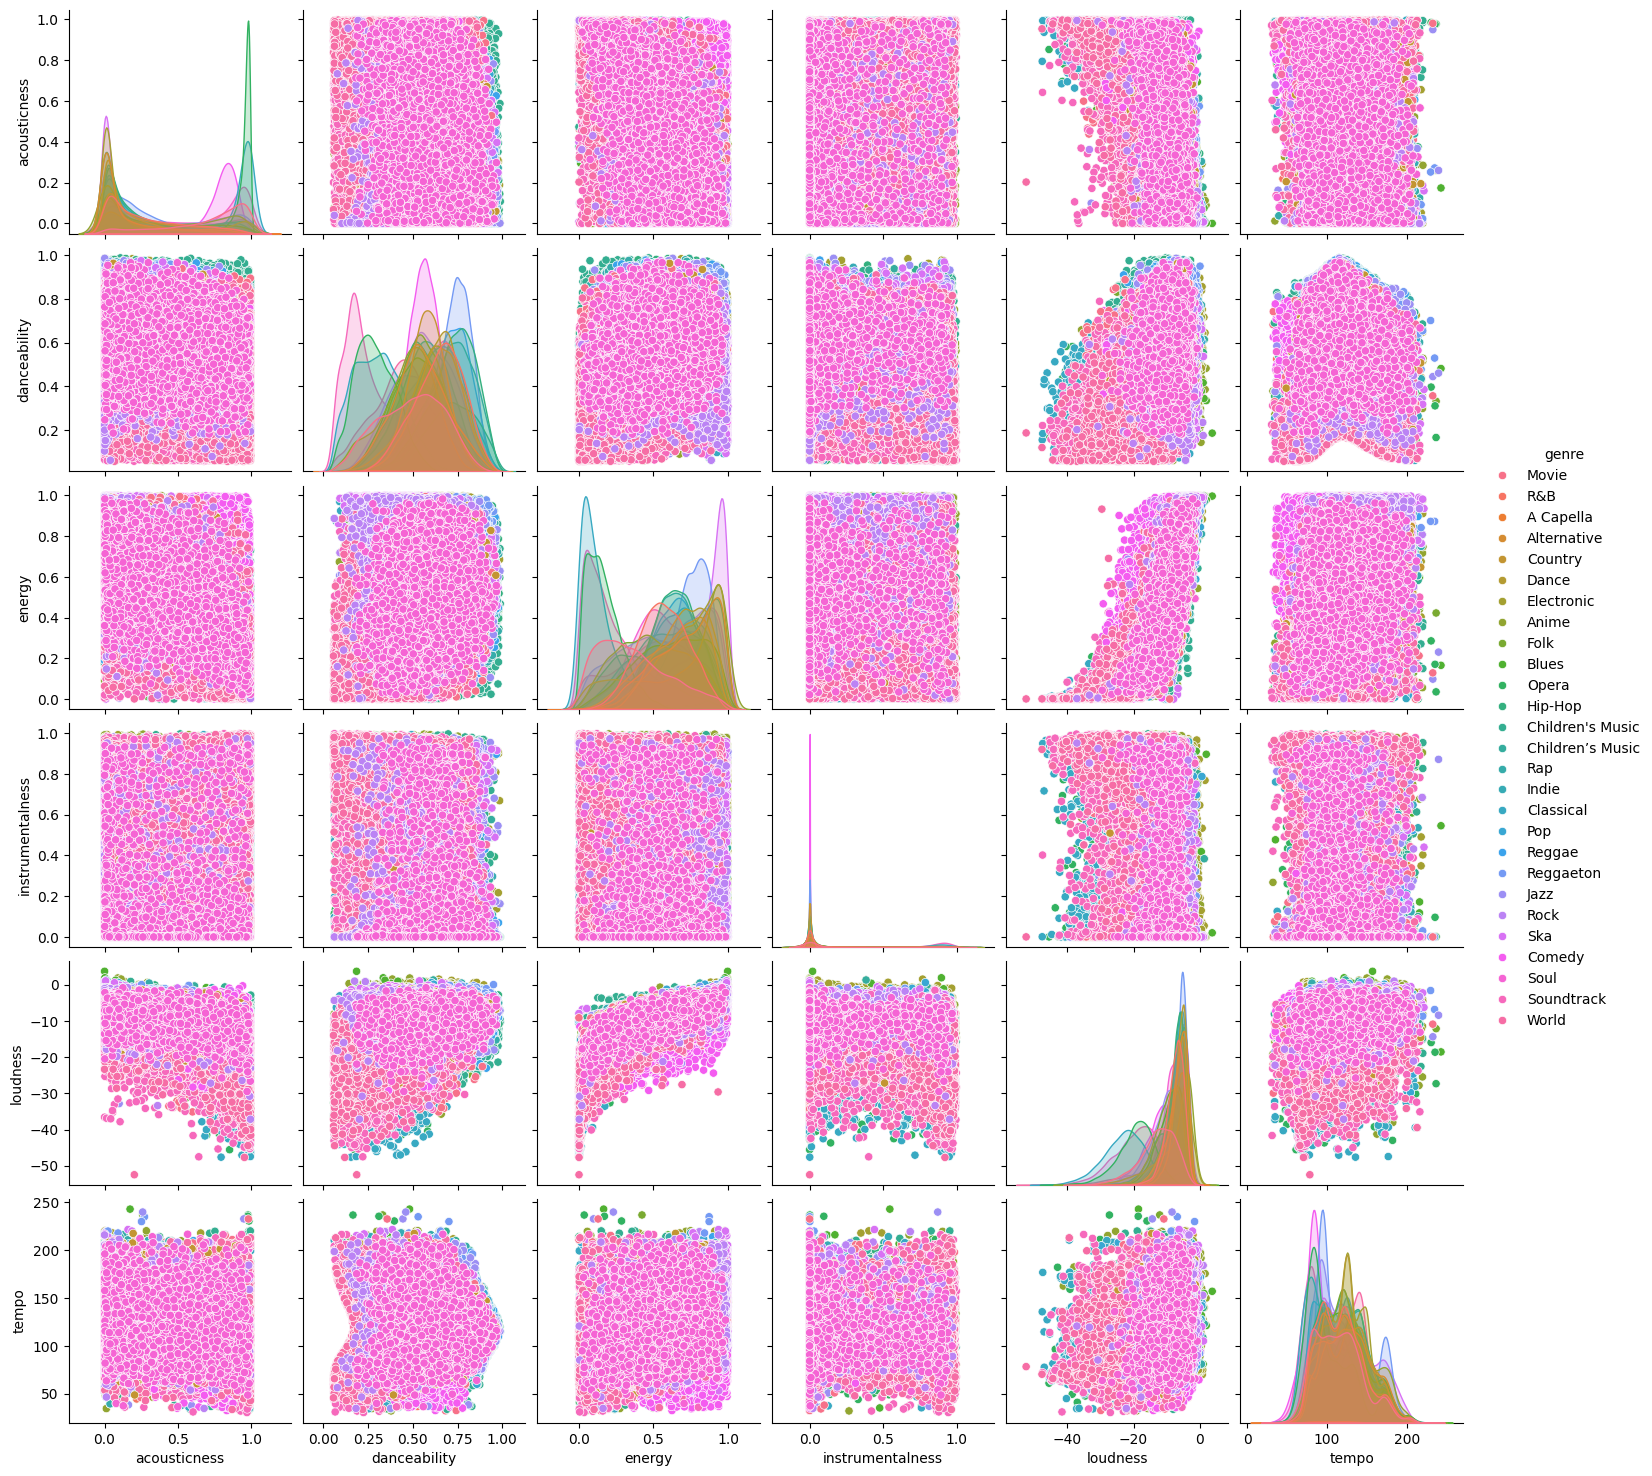

In [ ]:
sns.pairplot(df, hue='genre') # Pairplot with hue for genre
plt.show()

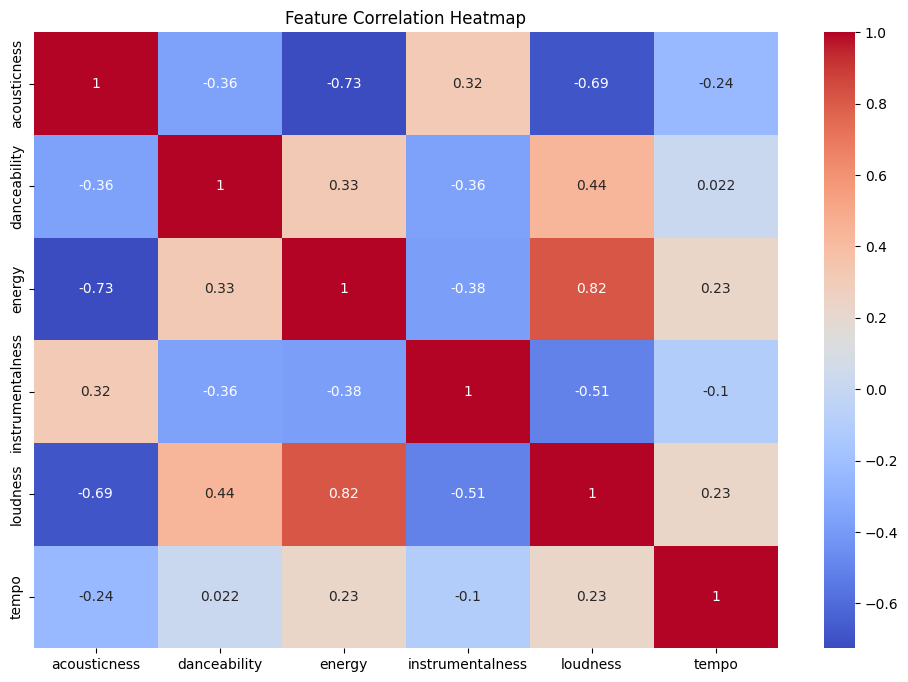

In [ ]:
# Heatmap to visualize correlation between features

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

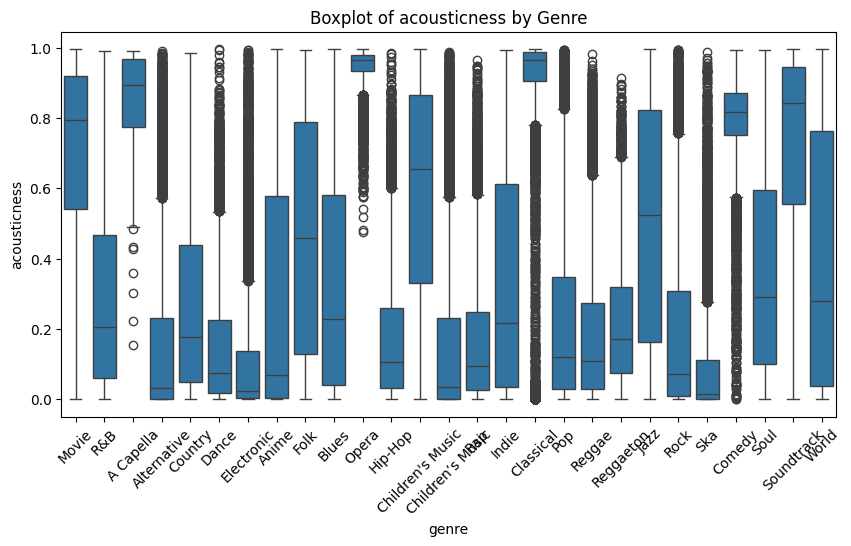

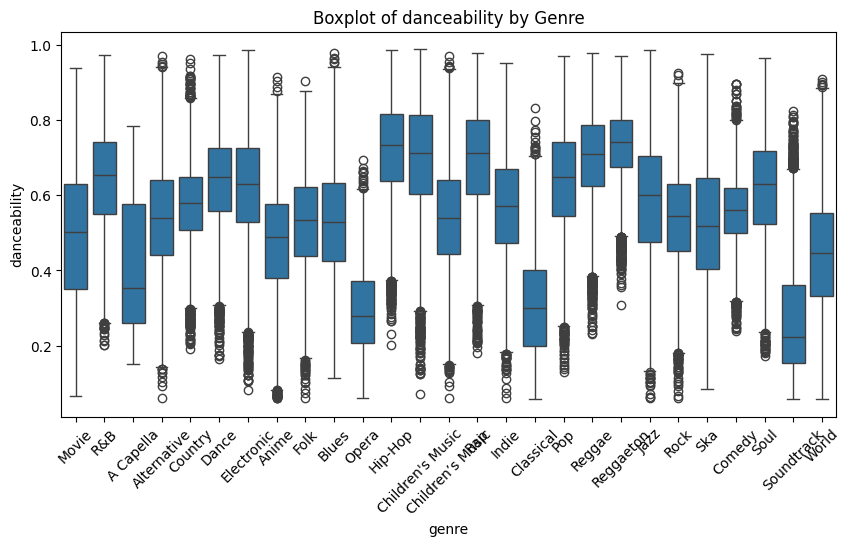

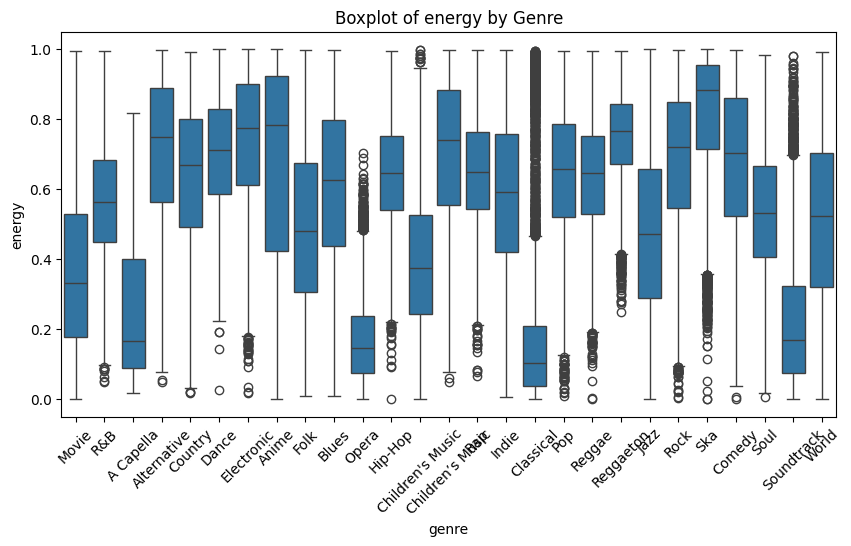

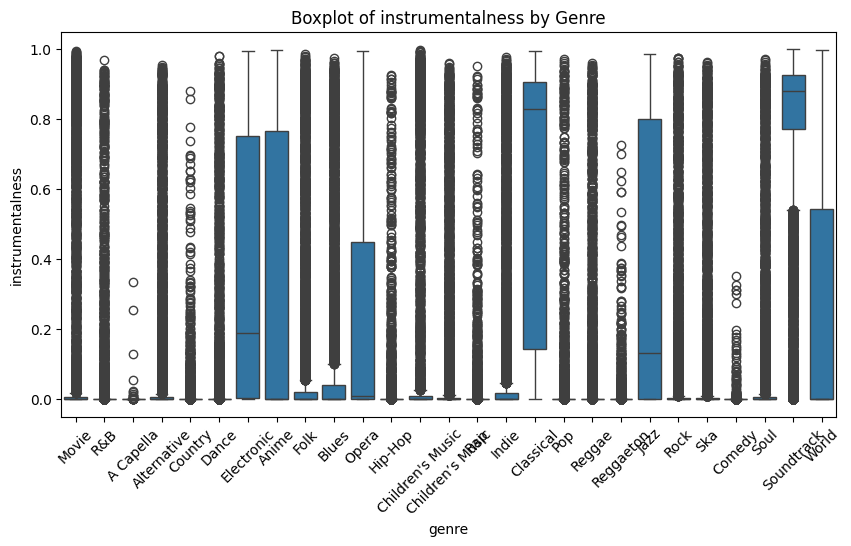

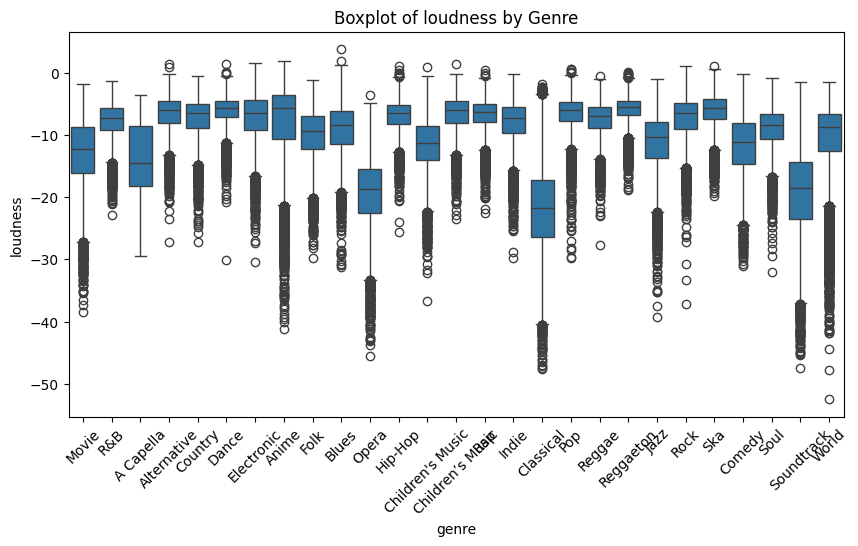

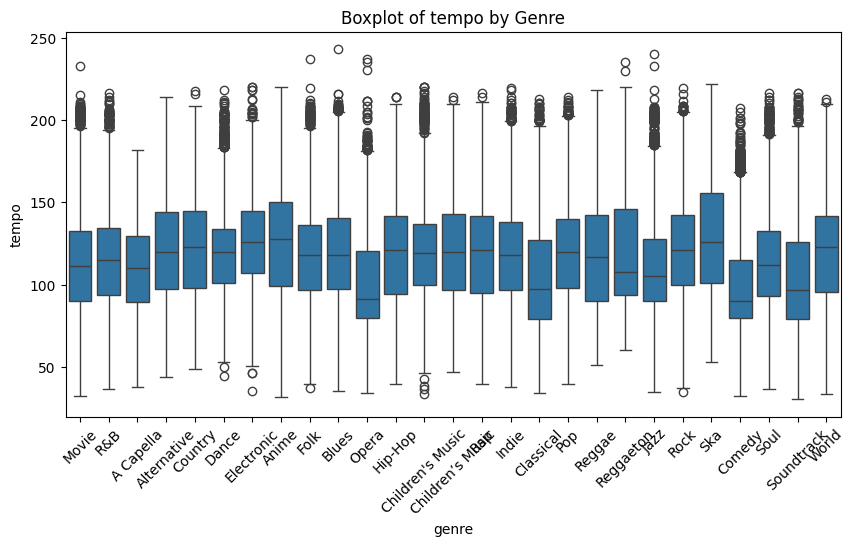

In [ ]:
# Boxplots to visualize distribution of features by genre
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='genre', y=col, data=df)
    plt.title(f'Boxplot of {col} by Genre')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (excluding 'genre' if it's present)
numeric_features = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])  # Standardize numeric features

In [51]:
from sklearn.preprocessing import LabelEncoder
 
# Encode genre labels if they are in text form
if df['genre'].dtype == 'object':
    le = LabelEncoder()
    df['genre'] = le.fit_transform(df['genre'])

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('genre', axis=1), df['genre'], test_size=0.2)

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rfc = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
# Predict on the test set
y_pred = rfc.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.27251047373509507

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.16      0.05      0.08      1828
           2       0.28      0.21      0.24      1859
           3       0.17      0.21      0.19      1791
           4       0.36      0.35      0.36      1095
           5       0.13      0.07      0.09      1918
           6       0.45      0.49      0.47      1853
           7       0.69      0.91      0.79      1898
           8       0.12      0.34      0.18      1705
           9       0.16      0.05      0.08      1840
          10       0.34      0.49      0.40      1906
          11       0.14      0.22      0.17      1833
          12       0.19      0.25      0.21      1812
          13       0.10      0.03      0.04      1909
          14       0.27      0.28      0.28      1863
          15       0.22      0.19      0.21      1632
          16       0.53   

C:\Users\FLOW\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FLOW\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\FLOW\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

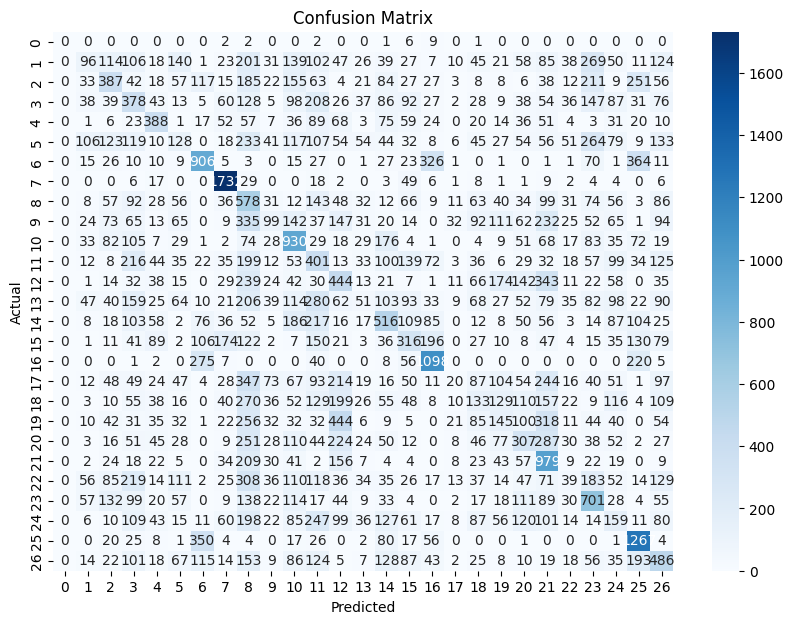

In [59]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()